In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"

from scipy.io import savemat, loadmat
from scipy.ndimage import gaussian_filter1d as gf1d
import colorsys

In [2]:
# %matplotlib widget 

## Load data

In [3]:
def RBF(d,lmbda):
    return np.exp(-d**2/2/lmbda**2)

def mldivide(A,B):
    return np.linalg.pinv(A).dot(B)
    
def sm_GP(qq,f,lmbda,sigma):
    d_ij = qq.reshape(len(qq),1) - qq.reshape(1,len(qq))
    
    K = RBF(d_ij,lmbda)
    K_s = K
    K_y = K + np.eye(len(qq))*sigma**2
    
    y = f
    L = np.linalg.cholesky(K_y)

    alpha = mldivide(L.T,mldivide(L,y))
    E = K_s.T@alpha
    
    return E

In [4]:
#### Meshgrid ####
n_grid = 100
x = np.linspace(-1,1,n_grid+1)
y = np.linspace(-1,1,n_grid+1)
z = np.linspace(-1,1,n_grid+1)

r_grid = np.meshgrid(x,y,z) 

# calculate scattering function
box_size = 2
n_grid_scale = 256
scale = n_grid_scale/r_grid[0].shape[0]
dq = 2*np.pi/box_size
qq = np.arange(n_grid_scale/2)*dq

#### Wave vector distribution ####
kz_list = np.arange(10)+1
kxy_list = np.arange(10)+1
kz_grid, kxy_grid = np.meshgrid(kz_list,kxy_list)

#### load data ####
filename = './S_q_kxy_fix_d.mat'
data = loadmat(filename)
k_grid = data['k_grid']
S_q_kxy = data['S_q_kxy']
S_q_kxy_sm = np.exp(np.array([gf1d(f[1:],1,mode='nearest') for f in np.log(S_q_kxy)]))

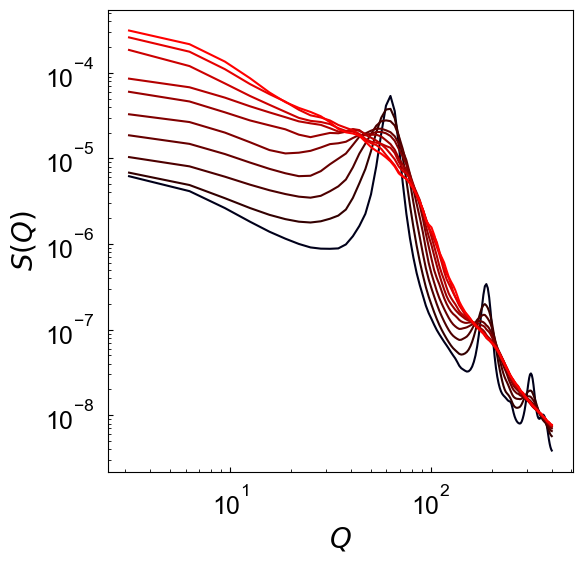

In [60]:
## plot results
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

for i in range(len(k_grid)):
    h = np.arctan2((k_grid[i][0]-1),(k_grid[i][1]-1))/np.pi*2/3+2/3
    s = 1
    v = np.max([k_grid[i][0]/10,k_grid[i][1]/10])

    color = colorsys.hsv_to_rgb(h,s,v)

    if k_grid[i][1]==1:
        ax.plot(qq[1:],S_q_kxy_sm[i,:],'-',color=color)
        # ax.plot(qq[1:],S_q_kxy[i,1:],'-',color=color)

ax.set_xlabel(r'$Q$',fontsize=20)
ax.set_ylabel(r'$S(Q)$',fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

plt.show()

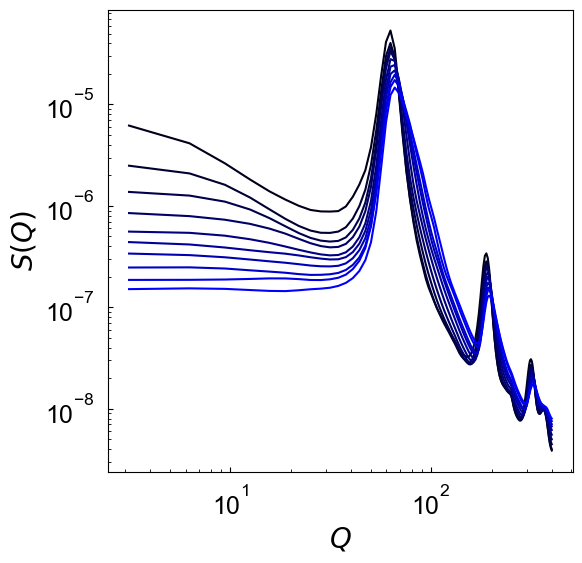

In [58]:
## plot results
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

for i in range(len(k_grid)):
    h = np.arctan2((k_grid[i][0]-1),(k_grid[i][1]-1))/np.pi*2/3+2/3
    s = 1
    v = np.max([k_grid[i][0]/10,k_grid[i][1]/10])

    color = colorsys.hsv_to_rgb(h,s,v)

    if k_grid[i][0]==1:
        ax.plot(qq[1:],S_q_kxy_sm[i,:],'-',color=color)
        # ax.plot(qq[1:],S_q_kxy[i,1:],'-',color=color)

ax.set_xlabel(r'$Q$',fontsize=20)
ax.set_ylabel(r'$S(Q)$',fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

plt.show()

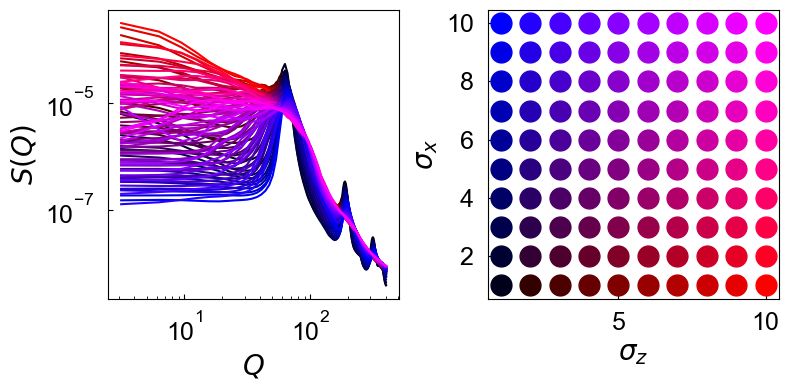

In [55]:
## plot results
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1)

for i in range(len(k_grid)):
    h = np.arctan2((k_grid[i][0]-1),(k_grid[i][1]-1))/np.pi*2/3+2/3
    s = 1
    v = np.max([k_grid[i][0]/10,k_grid[i][1]/10])

    color = colorsys.hsv_to_rgb(h,s,v)

    
    # ax.plot(qq[1:],S_q_kxy[i,1:],'-',color=color)
    ax.plot(qq[1:],S_q_kxy_sm[i,:],'-',color=color)

ax.set_xlabel(r'$Q$',fontsize=20)
ax.set_ylabel(r'$S(Q)$',fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

ax = fig.add_subplot(1,2,2)
for i in range(len(k_grid)):
    h = np.arctan2((k_grid[i][0]-1),(k_grid[i][1]-1))/np.pi*2/3+2/3
    s = 1
    v = np.max([k_grid[i][0]/10,k_grid[i][1]/10])

    color = colorsys.hsv_to_rgb(h,s,v)

    
    ax.plot(k_grid[i][0],k_grid[i][1],'.',color=color,ms=30)

ax.set_xlabel(r'$\sigma_{z}$',fontsize=20)
ax.set_ylabel(r'$\sigma_{x}$',fontsize=20)
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)



plt.tight_layout()
plt.show()

## SVD

In [8]:
f_F = lambda x: np.log(x)-np.mean(np.log(x),axis=0) # N by 80
F = f_F(S_q_kxy_sm)
U, S, Vh = np.linalg.svd(F)
# sgn = np.sign(Vh[:,60])
FV = F@Vh.T

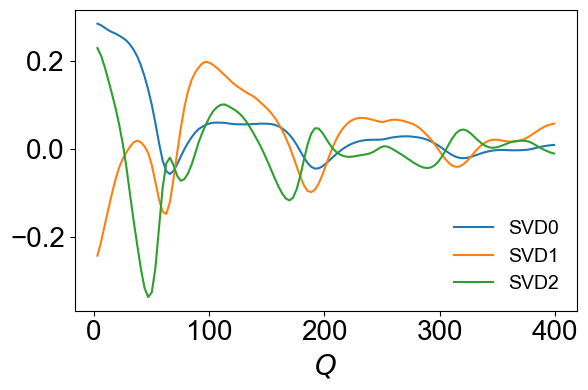

In [54]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.plot(qq[1:],Vh[0], label='SVD0')
ax.plot(qq[1:],Vh[1], label='SVD1')
ax.plot(qq[1:],Vh[2], label='SVD2')

# ax.set_xticks([0,16])
ax.set_xlabel(r'$Q$',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.legend(fontsize=14,framealpha=0,loc='lower right')

plt.tight_layout()
plt.show()

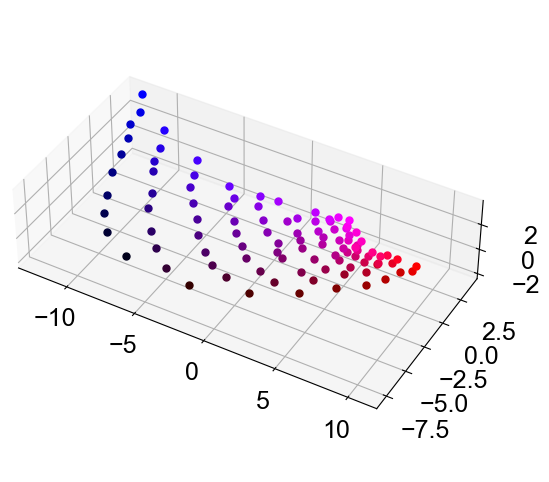

In [53]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1,projection='3d')

for i, k in enumerate(k_grid):    
    h = np.arctan2((k_grid[i][0]-1),(k_grid[i][1]-1))/np.pi*2/3+2/3
    s = 1
    v = np.max([k_grid[i][0]/10,k_grid[i][1]/10])
    color = colorsys.hsv_to_rgb(h,s,v)

    ax.plot(FV[i,0],FV[i,1],FV[i,2],'.',ms=10,c=color) 
    ax.set_aspect('equal')

ax.view_init(elev=40, azim=-60)

# ax.set_xlabel('SVD0',fontsize=20)
# ax.set_ylabel('SVD1',fontsize=20)
# ax.set_zlabel('SVD2',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

# plt.tight_layout()
plt.show()

## GPR

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF

### LML landscape

In [15]:
X = F
Y_0 = k_grid[:,0]
Y_1 = k_grid[:,1]

kernel = RBF(1) + WhiteKernel(1)
gp_0 = GaussianProcessRegressor(kernel=kernel, alpha=0.0, optimizer=None).fit(X, Y_0)
gp_1 = GaussianProcessRegressor(kernel=kernel, alpha=0.0, optimizer=None).fit(X, Y_1)

lmbda = np.logspace(-0.5, 1.5, 41)
sigma = np.logspace(-3, 1, 41)

Lmbda, Sigma = np.meshgrid(lmbda, sigma)
LML_0 = [[gp_0.log_marginal_likelihood(np.log([Lmbda[i, j], Sigma[i, j]]))
        for i in range(Lmbda.shape[0])]
        for j in range(Lmbda.shape[1])]
LML_0 = np.array(LML_0).T

LML_1 = [[gp_1.log_marginal_likelihood(np.log([Lmbda[i, j], Sigma[i, j]]))
        for i in range(Lmbda.shape[0])]
        for j in range(Lmbda.shape[1])]
LML_1 = np.array(LML_1).T

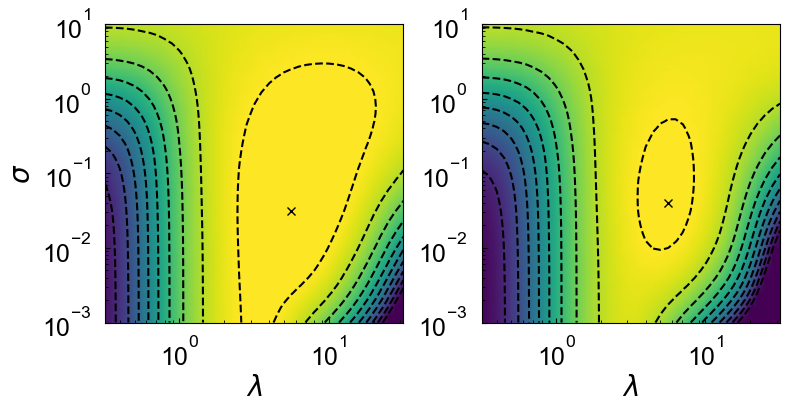

In [47]:
#### plotting
fig = plt.figure(figsize=(8,4))#,dpi=192)

## k_z
ax = fig.add_subplot(1, 2, 1)
ax.set_aspect(0.5)

levels = np.linspace(-2e3,-2e2,10)

index = np.argmax(LML_0)
index_arr_0 = np.unravel_index(index, LML_0.shape)

ax.plot(Lmbda[index_arr_0],Sigma[index_arr_0], 'xk')

ax.contour(Lmbda, Sigma, LML_0, levels, colors='k')
ax.pcolormesh(Lmbda, Sigma, LML_0, shading='gouraud', vmin = -2e3, vmax = -2e2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\lambda$',fontsize=20)
ax.set_ylabel(r'$\sigma$',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

## k_x
ax = fig.add_subplot(1, 2, 2)
ax.set_aspect(0.5)

levels = np.linspace(-2e3,-2e2,10)

index = np.argmax(LML_1)
index_arr_1 = np.unravel_index(index, LML_1.shape)

ax.plot(Lmbda[index_arr_1],Sigma[index_arr_1], 'xk')

ax.contour(Lmbda, Sigma, LML_1, levels, colors='k')
ax.pcolormesh(Lmbda, Sigma, LML_1, shading='gouraud', vmin = -2e3, vmax = -2e2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\lambda$',fontsize=20)
# ax.set_ylabel(r'$\sigma$',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

plt.tight_layout()

### Train GPR model

In [18]:
kernel_0 = RBF(Lmbda[index_arr_0], (1e0, 1e1)) + WhiteKernel(Sigma[index_arr_0], (1e-2,1e-1))
gp_opt_0 = GaussianProcessRegressor(kernel=kernel_0, alpha=0.0, n_restarts_optimizer=10)
gp_opt_0.fit(X, Y_0)

kernel_1 = RBF(Lmbda[index_arr_1], (1e0, 1e1)) + WhiteKernel(Sigma[index_arr_1], (1e-2,1e-1))
gp_opt_1 = GaussianProcessRegressor(kernel=kernel_1, alpha=0.0, n_restarts_optimizer=10)
gp_opt_1.fit(X, Y_1)

GaussianProcessRegressor(alpha=0.0,
                         kernel=RBF(length_scale=5.62) + WhiteKernel(noise_level=0.0398),
                         n_restarts_optimizer=10)

### Prediction

In [21]:
X_fit = f_F(S_q_kxy[:,1:])
k_grid_pred_0, k_grid_std_0 = gp_opt_0.predict(X_fit,return_std=True)
k_grid_pred_1, k_grid_std_1 = gp_opt_1.predict(X_fit,return_std=True)

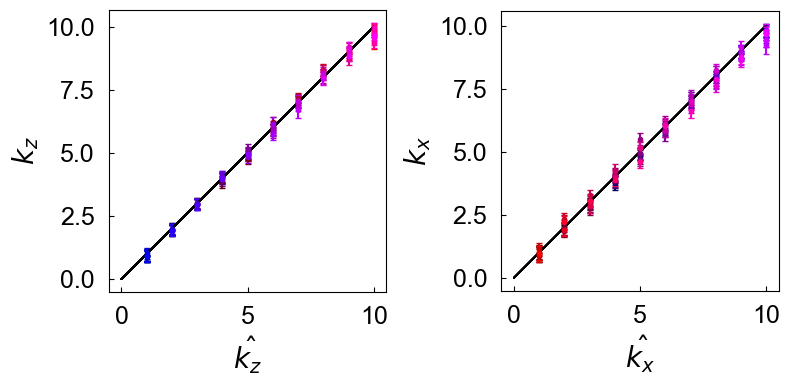

In [48]:
## plot results
fig = plt.figure(figsize=(8,4))

## k_z
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
for i in range(len(k_grid)):
    h = np.arctan2((k_grid[i][0]-1),(k_grid[i][1]-1))/np.pi*2/3+2/3
    s = 1
    v = np.max([k_grid[i][0]/10,k_grid[i][1]/10])

    color = colorsys.hsv_to_rgb(h,s,v)

    ax.plot([0,10],[0,10],'-k',lw=1)
    ax.errorbar(k_grid[i,0],k_grid_pred_0[i],k_grid_std_0[i],capsize=2,color=color,zorder=2)
    ax.plot(k_grid[i,0],k_grid_pred_0[i],'.',color=color,zorder=3)
    

ax.set_xlabel(r'$\hat{k_z}$',fontsize=20)
ax.set_ylabel(r'$k_z$',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

## k_x
ax = fig.add_subplot(1,2,2)
ax.set_aspect(1)
for i in range(len(k_grid)):
    h = np.arctan2((k_grid[i][0]-1),(k_grid[i][1]-1))/np.pi*2/3+2/3
    s = 1
    v = np.max([k_grid[i][0]/10,k_grid[i][1]/10])

    color = colorsys.hsv_to_rgb(h,s,v)

    ax.plot([0,10],[0,10],'-k',lw=1)
    ax.errorbar(k_grid[i,1],k_grid_pred_1[i],k_grid_std_1[i],capsize=2,color=color,zorder=2)
    ax.plot(k_grid[i,1],k_grid_pred_1[i],'.',color=color,zorder=3)
    

ax.set_xlabel(r'$\hat{k_x}$',fontsize=20)
ax.set_ylabel(r'$k_x$',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

plt.tight_layout()